# **Decision Tree Regression**

Decision Tree temelinde **split** (bölme) işlemi vardır.

Decision Tree x1 ve x2 adındaki featureları split ile gruplara ayrılarak model oluşturulur. Oluşturulan bu model üzerinden prediction yapılır.

Machine learning'de splitlere ayırırken **information entropy** kullanılır.

Splitler sonucu oluşan bölümlere **terminal leaf** denir.

Prediction yapılırken, predict edilecek değere (y) bakılır, bu y değerinin hangi gruba ait olduğu bulunur ve o grubun ortalama y değeri verilir.

Decision Tree belirli aralıklar için hep aynı sonucu üreteceğinden ne kadar bölüm olursa modelin hassasiyeti o kadar artar. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Kullanıcak data tribünlerdeki koltukların seviyeleri ve fiyatlarından oluşmaktadır.

Koltuk seviyeleri x feature'ını, koltuk fiyatları y label'ını oluşturmaktadır.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/decision+tree+regression+dataset.csv", sep=";", header=None)
#datada sütunların adları olmadığından header=None kullanılmazsa ilk satırı sütun adları olarak alır.

In [ ]:
df

,0,1
0,1,100
1,2,80
2,3,70
3,4,60
4,5,50
5,6,40
6,7,30
7,8,20
8,9,10
9,10,5


Dataya bakıldığında tribündeki en iyi yer 1. sıra ve fiyatı 100 lira, 10. seviye en kötü yer fiyatı 5 liradır.

x ekseni seviyeler, y ekseni fiyatlar olacaktır.

Bu datada tek bir x feature'ı vardır. Bu yüzden oluşturulacak model 2 boyutlu olacaktır.

In [ ]:
x = df.iloc[:,0].values.reshape(-1,1) 
y = df.iloc[:,1].values.reshape(-1,1) #values methodu ile pandas series array'e çevrilip, reshape methodu ile 1 sütundan oluştuğu sklearn'e bildirilir.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor() #DecisionTreeRegressor modeli tree_reg adlı variable'a eşitlenir.
tree_reg.fit(x,y)                  #x ve y değerleri kullanılarak model fit edilir.

DecisionTreeRegressor()

In [ ]:
tree_reg.predict([[6]]) #oluşturulan modele göre 6 nolu seviyenin fiyatı 40 lira olarak tahmin edilmiştir.
                        #dataframe'e bakıldığında da aynı sonuç görülür.
                        #buradan modelin doğru tahmin yaptığı anlaşılır.

array([40.])

In [ ]:
tree_reg.predict([[5.5]]) #5.5 değeri ortalama 50 liraya denk gelir.

array([50.])

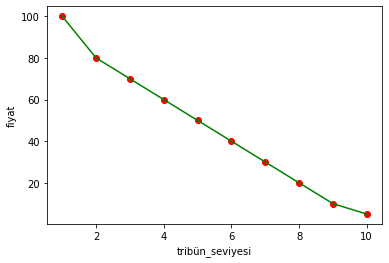

In [ ]:
y_head = tree_reg.predict(x) #x değerlerine karşılık gelen y değerleri predict edilir ve bu yapılan prediction'ın görselleştirmesi yapılır.
plt.scatter(x,y,color="red")
plt.plot(x,y_head,color="green")
plt.xlabel("tribün_seviyesi")
plt.ylabel("fiyat")
plt.show()

Bu plotta sadece verideki değerler predict edildi. Ancak herhangi bir leaf'teki tüm x değerlerinin sonucu tek bir y değerini vermektedir. Bu yüzden belirli aralıklarla düz bir çizginin oluşması lazımdır. Böylelikle daha büyük bir aralıkta prediction yapılmış olur.

In [ ]:
x_ = np.arange(min(x),max(x),0.01).reshape(-1,1)  
#x değerleri 1-10 arasındadır.
#plotta bir leaf'teki tüm x değerlerinin aynı sonucu vermesi için minimum x değerinden maximum x değerine kadar 0.01 aralıklar ile sayılar üretilir.

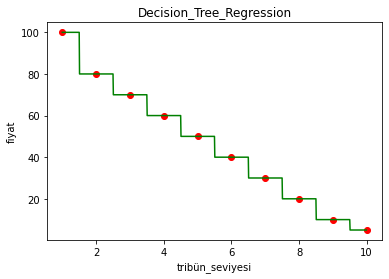

In [ ]:
y_head = tree_reg.predict(x_)  #x değerlerine karşılık gelen y değerleri predict edilir ve bu yapılan prediction'ın görselleştirmesi yapılır.
plt.scatter(x,y,color="red")
plt.plot(x_,y_head,color="green")
plt.xlabel("tribün_seviyesi")
plt.ylabel("fiyat")
plt.title("Decision_Tree_Regression")
plt.show()

Plot incelendiğinde;

1–1,5 (leaf)

1,5–2,5 (leaf)

2,5–3,5 (leaf)...

Her biri tree'deki ayrı bir yaprağı temsil etmektedir ve bu aralıklarda tahmin edilen y değerleri aynı sonucu vermektedir.

Grafikte ani geçişlerin olduğu yerler split işlemidir.